In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

In [1]:
with open('results.pkl','r') as pickleFile:
    results = pickle.load(pickleFile)

NameError: name 'pickle' is not defined

In [4]:
results['Green']

{0: (0.11545272696813129, 0.0003187904271785761),
 1: (0.11530967296547308, 0.00021730259956978827),
 2: (0.11529550283149809, 0.00035278133457088817),
 3: (0.11534821416654319, 0.0003000996890024629),
 4: (0.11533166907284333, 0.00022087667856292596),
 5: (0.11531088082851802, 0.00025998602079610705),
 6: (0.11538763430714644, 0.00031266874471178372)}

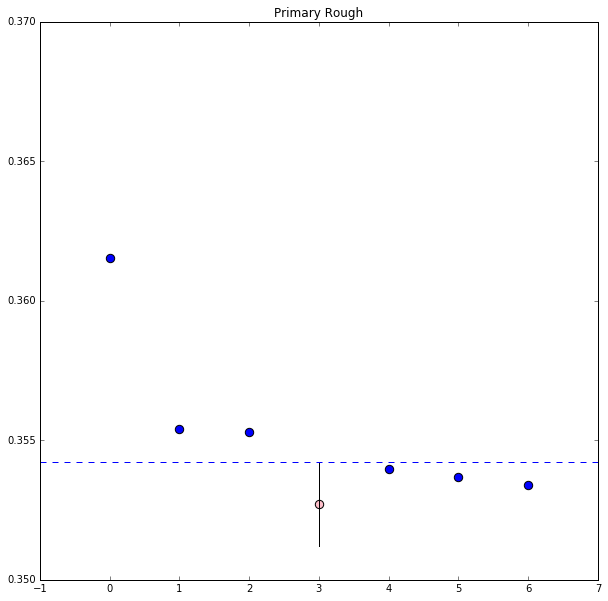

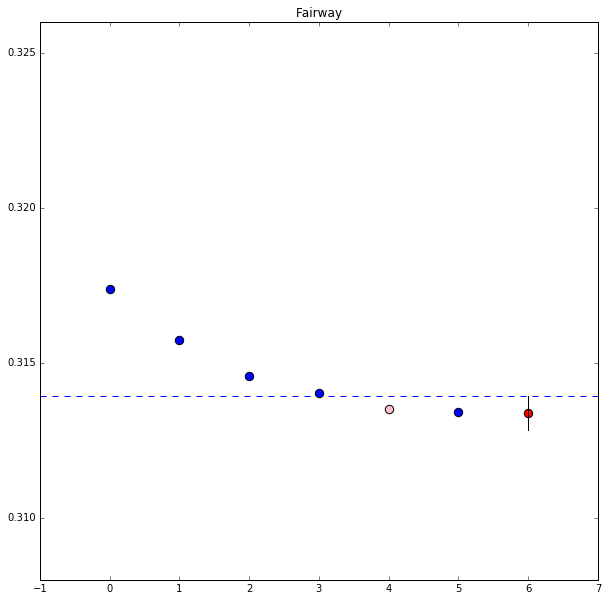

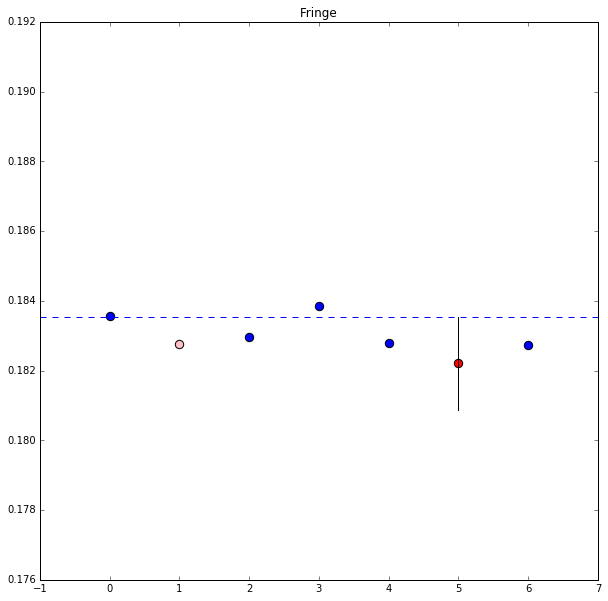

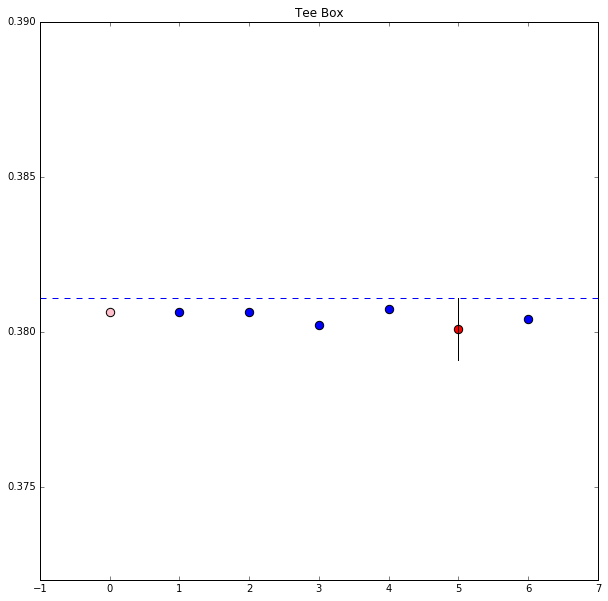

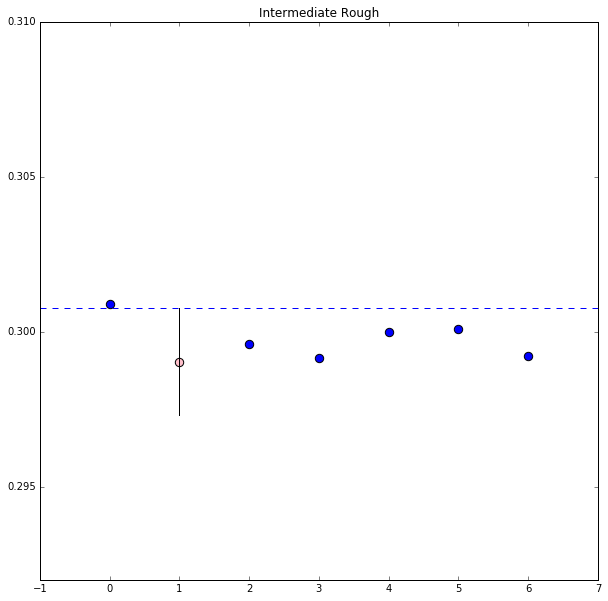

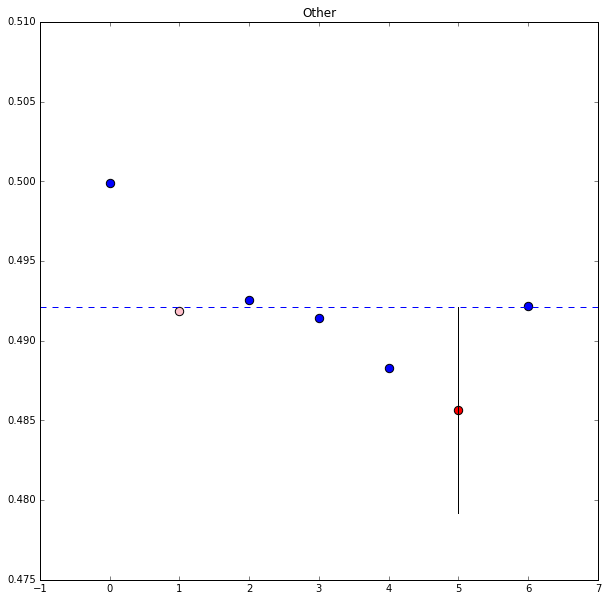

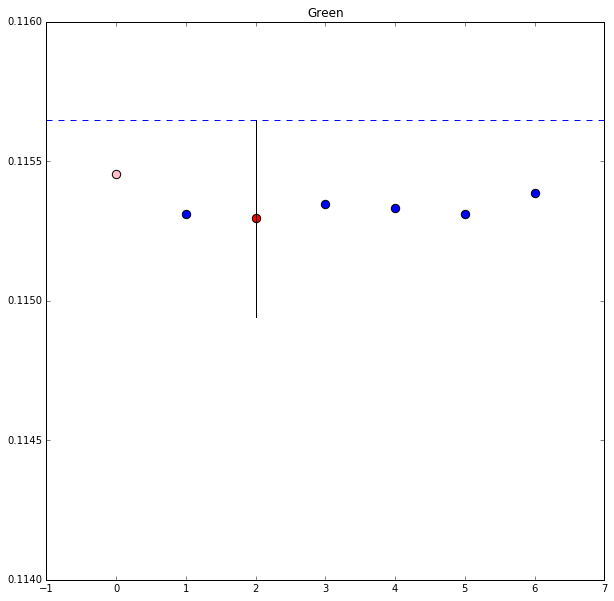

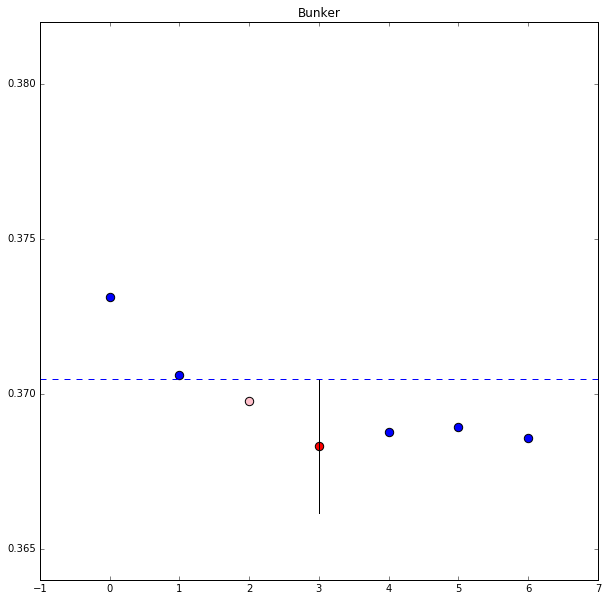

In [44]:
for cat in results:
    plt.figure(figsize=(10,10))
    min_u = sorted(results[cat],key=results[cat].get)[0]
    for u in results[cat]:
        mean,std = results[cat][u]
        if u==min_u:
            if u==min(u for u in results[cat] if results[cat][u][0]<=results[cat][min_u][0]+results[cat][min_u][1]):
                color = 'pink'
            else:
                color = 'red'
        elif u==min(u for u in results[cat] if results[cat][u][0]<=results[cat][min_u][0]+results[cat][min_u][1]):
            color = 'pink'
        else:
            color = 'blue'
        plt.scatter([u],[mean],c=color,s=70)
    plt.plot((min_u, min_u), (results[cat][min_u][0]-results[cat][min_u][1], results[cat][min_u][0]+results[cat][min_u][1]), 'k-')
    plt.axhline(y=results[cat][min_u][0]+results[cat][min_u][1],ls='--')
    plt.title(cat)
    if cat=='Green':
        plt.ylim(.114,.116)
    plt.show()

In [2]:
5/(0.115301119917 + 0.11547213383 + 0.115522624577 + 0.114833938374 + 0.115569876966 )

8.670023679452703

In [2]:
1/2.834

0.3528581510232886

In [3]:
from scipy.stats import norm

In [4]:
def my_norm(x,BETA):
    return norm.pdf(x,0,BETA)/norm.pdf(0,0,BETA)

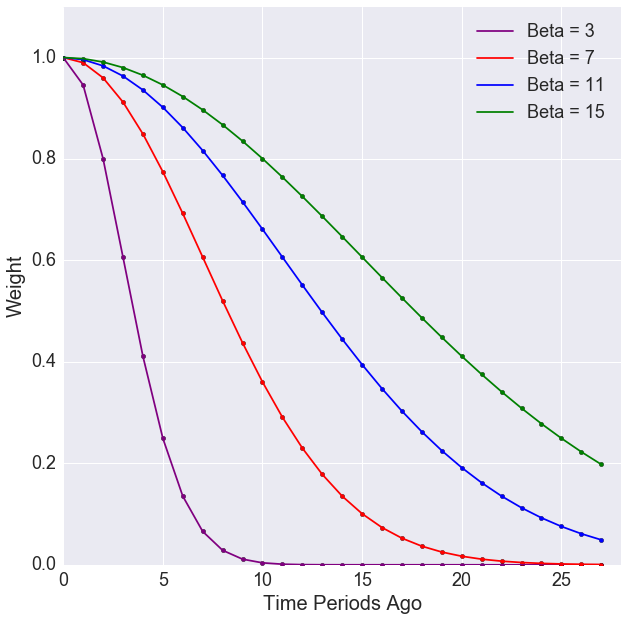

In [28]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
color_map = {3:'purple',7:'red',11:'blue',15:'green'}
for beta in [3,7,11,15]:
    plt.plot(np.arange(0,28),my_norm(np.arange(0,28),beta),label='Beta = '+str(beta),c=color_map[beta]);
    plt.scatter(np.arange(0,28),my_norm(np.arange(0,28),beta),c=color_map[beta]);
plt.legend(loc=1,prop={'size':18})
plt.xlim(0,28)
plt.ylim(0,1.1);
plt.setp(ax.get_xticklabels(), fontsize=18);
plt.setp(ax.get_yticklabels(), fontsize=18);
ax.set_xlabel('Time Periods Ago',fontsize=20);
ax.set_ylabel('Weight',fontsize=20);
plt.savefig('weights.png',dpi=700)